# Mini Project

## CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

## Authors: 
### <li> Manav Maheshwari (3759768) </li>
### <li> Reyaansh Vohra (3758608)</li>

## Introduction
### This project looks at crime across Canada and how income, schooling, and demographics may affect it. By comparing big cities like Toronto and Vancouver, we study patterns, gaps, and links. We note regional differences and missing data, but also show where policy and community action can help. The goal is to place crime data in its social context.

## Issue
### We track how crime levels and severity change from province to province and territory to territory. Looking back in time shows how and why crime shifts. Our work brings out these regional patterns, causes, and what they mean for police and policy makers.

## Approach
- ### **Data collection** – Crime stats came from public sources; income data came from Statistics Canada and city sites.  
- ### **Cleaning** – We fixed formats, matched areas and years, and handled missing values.  
- ### **Integration** – We merged crime and income data for direct comparison.  
- ### **Exploratory analysis** – Bar charts, time‑series plots, and scatter plots revealed trends and links.  
- ### **Findings and next steps** – The study highlights inequality and data gaps but also shows where targeted action could work.  


# Library Installation (uncomment if required)

In [1]:
# # %pip install pandas
# # %pip install matplotlib
# # %pip install seaborn
# %pip install statsmodels

## Importing Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Datasets

In [3]:

#Vancouver related datasets
vancouver_datasets = pd.read_csv("../datasets/Vancouver_all_crimes.csv")
vancouver_population_raw = pd.read_csv("../datasets/Vancouver_population.csv", delimiter = ';')
vancouver_income = pd.read_csv("../datasets/vancouver_income.csv")
#Toronto related datasets
tor_assault_datasets = pd.read_csv("../datasets/Toronto_Assaults.csv")
tor_break_and_enter = pd.read_csv("../datasets/Toronto_break_and_enter.csv")
tor_homicides = pd.read_csv("../datasets/Toronto_Homicides.csv")
toronto_population_raw = pd.read_csv("../datasets/Toronto_Population.csv", delimiter = ';')
toronto_income = pd.read_csv("../datasets/toronto_income.csv")



## Data Cleaning

### Cleaning of Toronto Population Dataset

In [4]:
year_raw = toronto_population_raw.iloc[8, 0]
population_raw = toronto_population_raw.iloc[10, 0]
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
toronto_population = pd.DataFrame({"Year": year, "Population": population})
toronto_population

,Year,Population
0,2014,5998737
1,2015,6045240
2,2016,6125013
3,2017,6217328
4,2018,6337780
5,2019,6462898
6,2020,6543886
7,2021,6547381
8,2022,6685621


### Cleaning of Vancouver Population Dataset

In [5]:
year_raw = vancouver_population_raw.iloc[8, 0]
population_raw = vancouver_population_raw.iloc[10, 0]
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
vancouver_population = pd.DataFrame({"Year": year, "Population": population})
vancouver_population

,Year,Population
0,2014,2507414
1,2015,2544484
2,2016,2582202
3,2017,2616904
4,2018,2658582
5,2019,2709277
6,2020,2743765
7,2021,2764932
8,2022,2842730


### Cleaning of Vancouver Crime Dataset

In [6]:
vd = vancouver_datasets.sort_values(by = 'YEAR', ascending=True)
sorted_values = ['Offence Against a Person', 'Homicide', 'Break and Enter Commercial', 'Break and Enter Residential/Other']

vd['CRIMES'] = vd['TYPE']
vancouver_dataset = vd[vd['CRIMES'].isin(sorted_values)][['CRIMES', 'YEAR', 'NEIGHBOURHOOD']]

vancouver_dataset = vancouver_dataset[(vancouver_dataset['YEAR'] > 2013) & (vancouver_dataset['YEAR'] < 2025)]

vancouver_dataset['CRIMES'] = vancouver_dataset['CRIMES'].replace({
    'Break and Enter Commercial': 'Break and Enter',
    'Break and Enter Residential/Other': 'Break and Enter',
    'Offence Against a Person' : 'Assault'
})


vancouver_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
4,Break and Enter,2014,West End
22,Break and Enter,2014,West End
12,Break and Enter,2014,West End
13,Break and Enter,2014,West End
163,Break and Enter,2014,Central Business District
...,...,...,...
267824,Assault,2024,Central Business District
267823,Assault,2024,Central Business District
45165,Break and Enter,2024,Marpole
267820,Assault,2024,Central Business District


### Cleaning of Toronto Crime Dataset

In [7]:

#fulfilling the first merge successfully
toronto_first_merge = pd.concat([tor_assault_datasets, tor_break_and_enter], axis=0)
toronto_first_merge['MERGED_CRIMES'] = toronto_first_merge['MCI_CATEGORY'].combine_first(toronto_first_merge['OFFENCE'])
toronto_first_clean = toronto_first_merge.drop(columns = ['MCI_CATEGORY', 'OFFENCE'])

toronto_first_clean.dropna()
#the second cleaning with toronto_homicides
toronto_second_merge = pd.concat([toronto_first_clean, tor_homicides], axis = 0)
toronto_second_merge['CRIMES'] = toronto_second_merge['MERGED_CRIMES'].combine_first(toronto_second_merge['HOMICIDE_TYPE'])


toronto_dataset = toronto_second_merge.drop(columns= ['MERGED_CRIMES', 'HOMICIDE_TYPE'])
toronto_dataset['NEIGHBOURHOOD'] = toronto_dataset['NEIGHBOURHOOD_158']
toronto_dataset['YEAR'] = toronto_dataset['OCC_YEAR'].fillna(0).astype(int)

toronto_dataset['CRIMES'] = toronto_dataset['CRIMES'].replace({
    'Shooting': 'Homicide',
    'Stabbing': 'Homicide',
})

toronto_dataset = toronto_dataset[~toronto_dataset['CRIMES'].isin(['Other'])]
toronto_dataset = toronto_dataset[(toronto_dataset['YEAR'] > 2013) & (toronto_dataset['YEAR'] < 2025)]

toronto_dataset = toronto_dataset[['CRIMES', 'YEAR', 'NEIGHBOURHOOD']].dropna()
toronto_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
0,Assault,2014,Corso Italia-Davenport (92)
1,Assault,2014,Lawrence Park North (105)
2,Assault,2014,Palmerston-Little Italy (80)
4,Assault,2014,West Rouge (143)
5,Assault,2014,West Rouge (143)
...,...,...,...
1476,Homicide,2024,Blake-Jones (69)
1477,Homicide,2024,Englemount-Lawrence (32)
1478,Homicide,2024,Scarborough Village (139)
1479,Homicide,2024,Corso Italia-Davenport (92)


### Cleaning of Toronto Income

In [8]:
toronto_income
toronto_income['Median Income'] = toronto_income['Median_After_Tax_Income_Toronto_CMA_$']
toronto_income = toronto_income[['Year', 'Median Income']]
toronto_income

,Year,Median Income
0,2014,33700
1,2015,34900
2,2016,36200
3,2017,37600
4,2018,39000
5,2019,40200
6,2020,43900
7,2021,43100
8,2022,42000


### Cleaning of Vancouver Income

In [9]:
vancouver_income
vancouver_income['Median Income'] = vancouver_income['Median_After_Tax_Income_Vancouver_CMA_$']
vancouver_income = vancouver_income[['Year', 'Median Income']]
vancouver_income

,Year,Median Income
0,2014,33400
1,2015,34800
2,2016,36000
3,2017,37400
4,2018,38700
5,2019,40000
6,2020,43600
7,2021,42800
8,2022,41500


## DATA PROCESSING SECTION

### Analyzing crime rates across different cities of Canada.

#### Total Crime Count Per Year For Toronto

In [10]:
toronto_crime_per_year = toronto_dataset.groupby('YEAR').size()

toronto_crime_per_year = toronto_crime_per_year.reset_index(name = 'Crime Count of Toronto')

toronto_crime = toronto_crime_per_year[toronto_crime_per_year['YEAR'] < 2023]
toronto_crime



,YEAR,Crime Count of Toronto
0,2014,24131
1,2015,25155
2,2016,25558
3,2017,26684
4,2018,27802
5,2019,29752
6,2020,25477
7,2021,24956
8,2022,27471


<h4> Total Crime Count Per Year For Vancouver </h4>

In [11]:
vancouver_crime_per_year = vancouver_dataset.groupby('YEAR').size()

vancouver_crime_per_year = vancouver_crime_per_year.reset_index(name = 'Crime Count of Vancouver')

vancouver_crime = vancouver_crime_per_year[vancouver_crime_per_year['YEAR'] < 2023]

vancouver_crime

,YEAR,Crime Count of Vancouver
0,2014,8421
1,2015,8775
2,2016,8881
3,2017,7845
4,2018,7503
5,2019,8240
6,2020,8647
7,2021,7374
8,2022,7213


#### Crime Rate Analysis

#### Toronto

In [12]:

toronto_crime_rate= pd.concat([toronto_crime, toronto_population], axis = 1).fillna(0).astype(int)

toronto_crime_rate["Crime Rate"] = (toronto_crime_rate["Crime Count of Toronto"] / toronto_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
toronto_analysis = toronto_crime_rate[['YEAR', 'Crime Rate']]
toronto_analysis

,YEAR,Crime Rate
0,2014,402.268011
1,2015,416.112512
2,2016,417.272584
3,2017,429.187587
4,2018,438.670954
5,2019,460.350759
6,2020,389.325242
7,2021,381.160039
8,2022,410.896759


#### Vancouver

In [13]:
vancouver_crime_rate = pd.concat([vancouver_crime, vancouver_population], axis = 1).fillna(0).astype(int)

vancouver_crime_rate["Crime Rate"] = (vancouver_crime_rate["Crime Count of Vancouver"] / vancouver_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
vancouver_analysis = vancouver_crime_rate[['YEAR', 'Crime Rate']]

vancouver_analysis

,YEAR,Crime Rate
0,2014,335.844021
1,2015,344.863634
2,2016,343.931265
3,2017,299.781727
4,2018,282.218115
5,2019,304.140182
6,2020,315.150897
7,2021,266.697336
8,2022,253.734966


#### Visualization

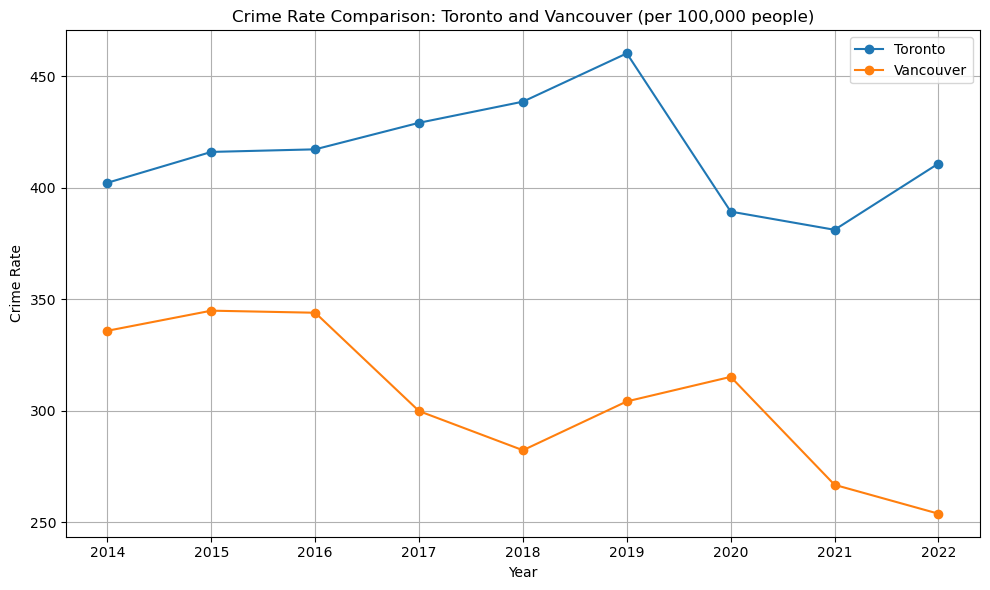

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(toronto_crime_rate["Year"], toronto_crime_rate["Crime Rate"], label="Toronto", marker="o")
plt.plot(vancouver_crime_rate["Year"], vancouver_crime_rate["Crime Rate"], label="Vancouver", marker="o")
plt.title("Crime Rate Comparison: Toronto and Vancouver (per 100,000 people)")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualize trends over time for various types of crime

#### Vancouver

<Figure size 1400x800 with 0 Axes>

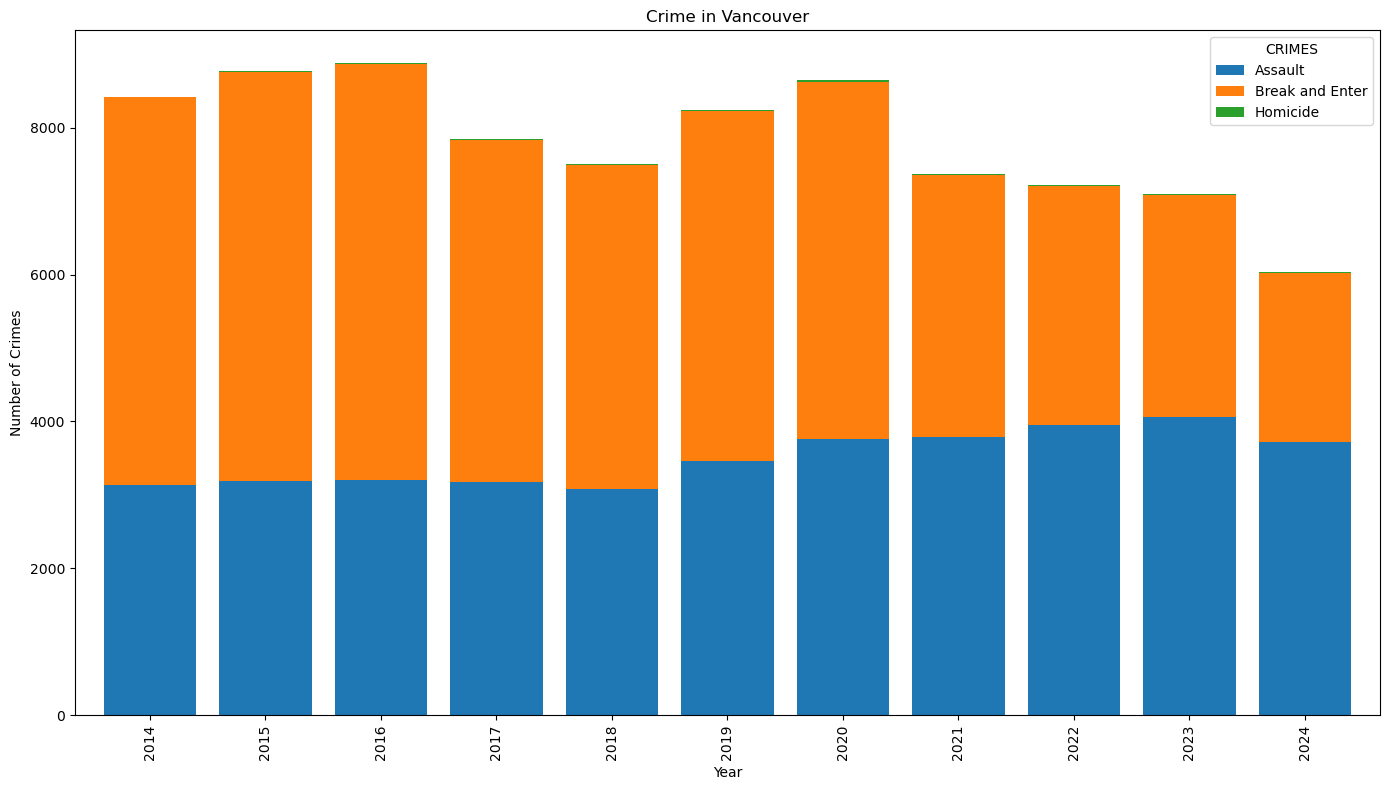

In [15]:

vd_grouped = vancouver_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
vd_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show(block = True)



#### Toronto

<Figure size 1400x800 with 0 Axes>

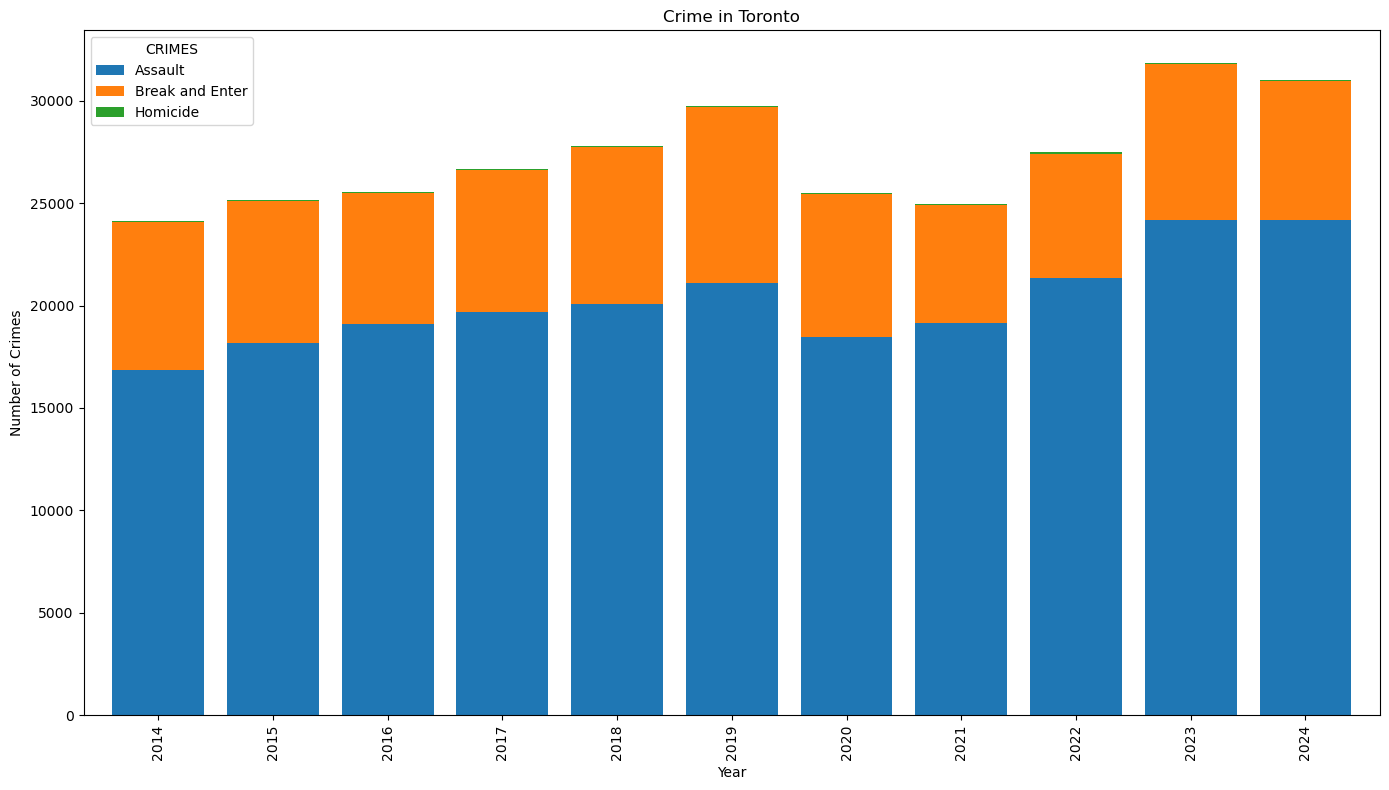

In [16]:


toronto_grouped = toronto_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
toronto_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


### Analysis to identify regions with higher or lower crime rates

#### Toronto

In [17]:
def zone(neighbourhood):
    if any(keyword in neighbourhood for keyword in ['Agincourt', 'Malvern', 'Bendale', 'Birchcliffe', 'Scarborough', 'Cliffside']):
        return 'Scarborough'
    elif any(keyword in neighbourhood for keyword in ['Alderwood', 'Humber', 'Rexdale', 'Islington', 'Etobicoke', 'Kingsview']):
        return 'Etobicoke'
    elif any(keyword in neighbourhood for keyword in ['Bathurst', 'Bayview', 'Don Mills', 'York Mills', 'Downsview', 'North York']):
        return 'North York'
    elif any(keyword in neighbourhood for keyword in ['Annex', 'Church-Wellesley', 'Bay-Cloverhill', 'Cabbagetown', 'Kensington', 'Downtown']):
        return 'Downtown'
    elif any(keyword in neighbourhood for keyword in ['Broadview', 'Danforth', 'Leaside', 'East York', 'Coxwell']):
        return 'East York'
    else:
        return 'Other'

toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)

toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

toronto_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,19969,6769,29
East York,7644,3038,24
Etobicoke,15021,6128,76
North York,5084,2779,12
Other,162703,54745,442
Scarborough,11872,3472,34


#### Vancouver

In [18]:
def vancouver_zone(neighbourhood):
    if neighbourhood in ['Central Business District', 'West End', 'Stanley Park']:
        return 'Downtown'
    elif neighbourhood in ['Kitsilano', 'Dunbar-Southlands', 'Arbutus Ridge', 'Shaughnessy', 'Kerrisdale', 'West Point Grey']:
        return 'West Side'
    elif neighbourhood in ['Grandview-Woodland', 'Hastings-Sunrise', 'Renfrew-Collingwood', 'Strathcona', 'Kensington-Cedar Cottage']:
        return 'East Vancouver'
    elif neighbourhood in ['Sunset', 'Victoria-Fraserview', 'Marpole', 'Killarney', 'Oakridge', 'South Cambie', 'Musqueam']:
        return 'South Vancouver'
    else:
        return 'Other'
    
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

vancouver_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,17836,11665,54
East Vancouver,12166,12119,54
Other,3280,8220,13
South Vancouver,3577,7281,25
West Side,1664,8069,9


#### Visualizing Toronto's Crimes Based On Zones 

<Figure size 1400x800 with 0 Axes>

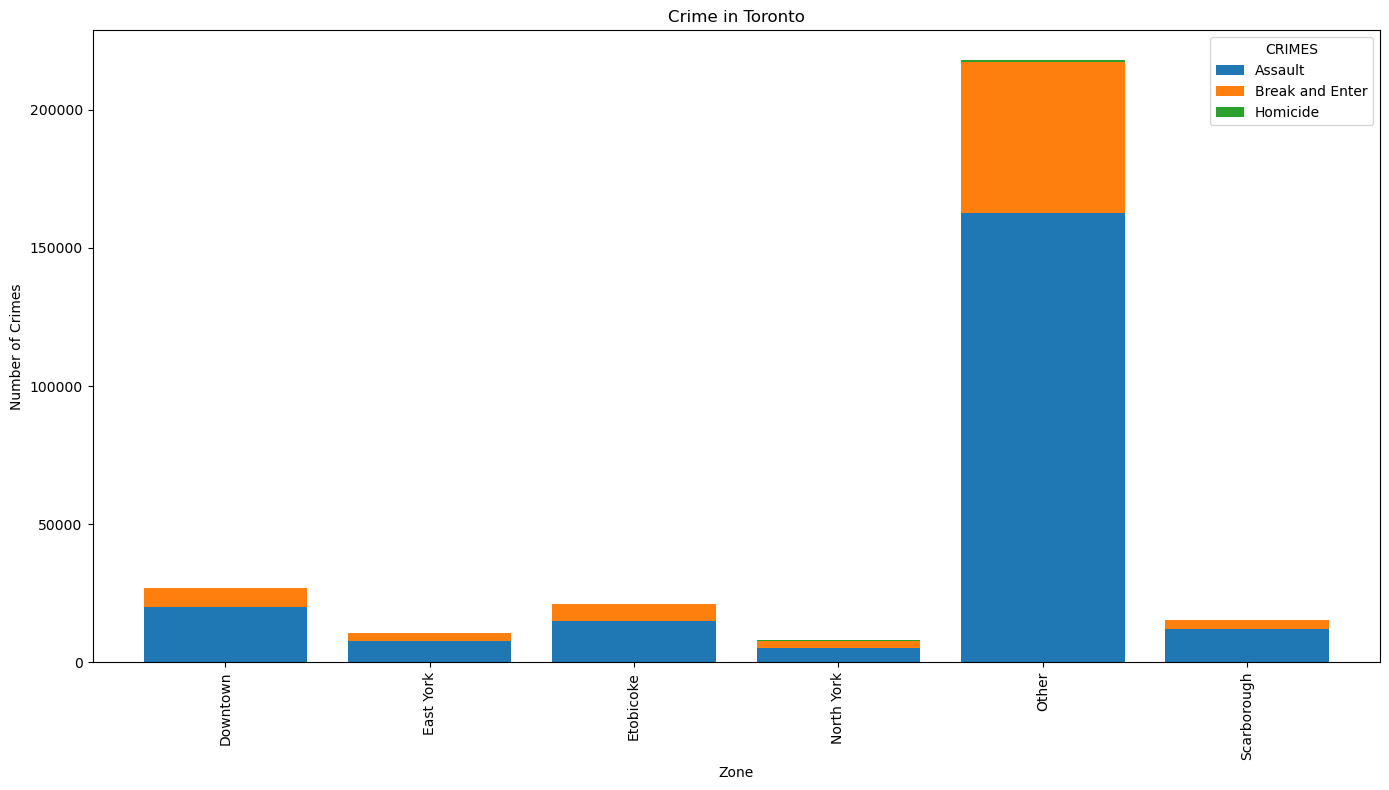

In [19]:
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

plt.figure(figsize=(14, 8))
toronto_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

#### Visualizing Vancouver's Crimes Based On Zones

<Figure size 1400x800 with 0 Axes>

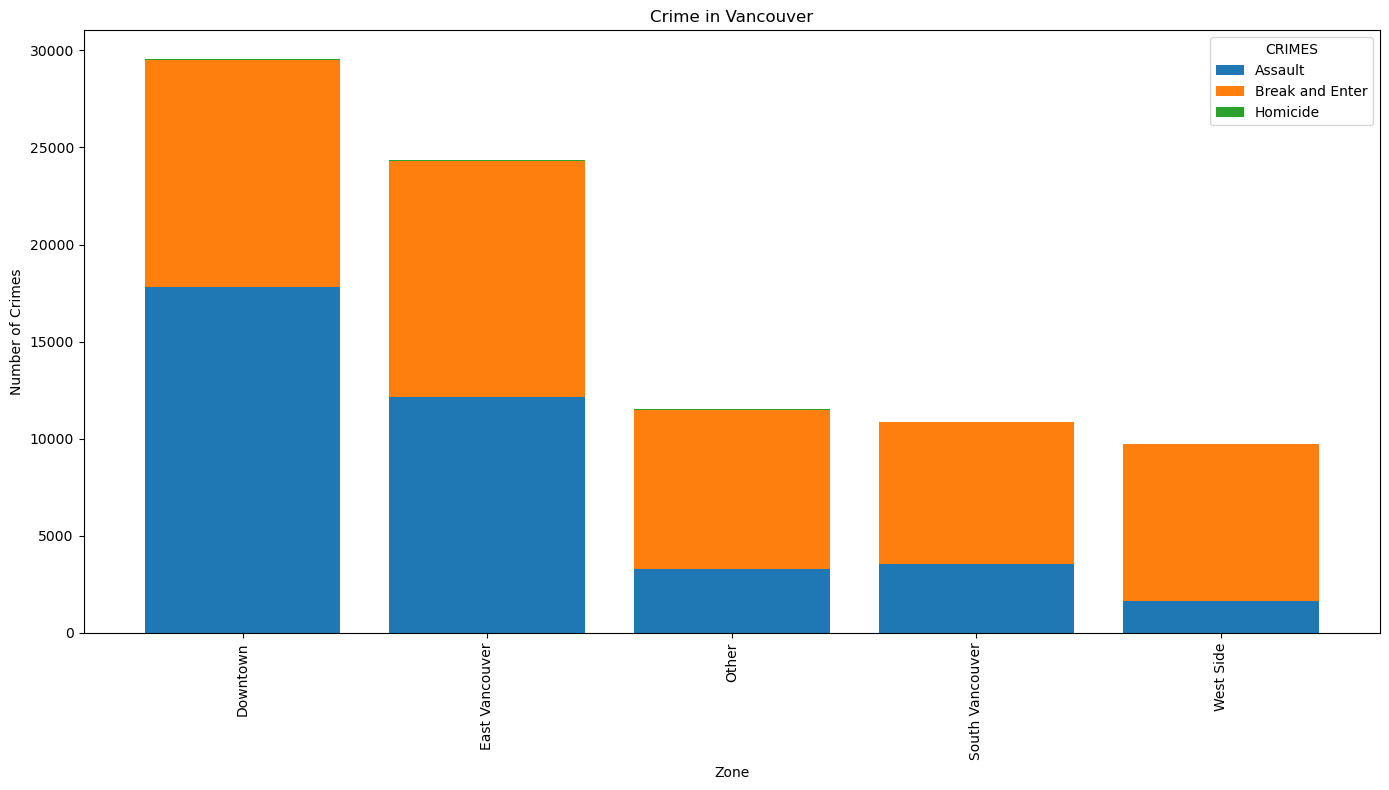

In [20]:
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)
plt.figure(figsize=(14, 8))
vancouver_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

### Compare crime rates with socioeconomic factors such as income levels or education [using income]

#### Toronto


/tmp/ipykernel_12006/2272122606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_analysis.rename(columns={"YEAR": "Year"}, inplace=True)


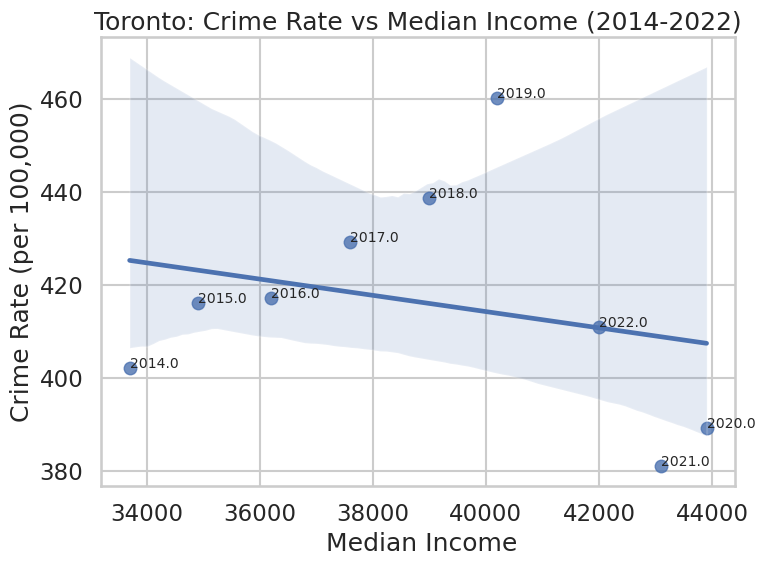

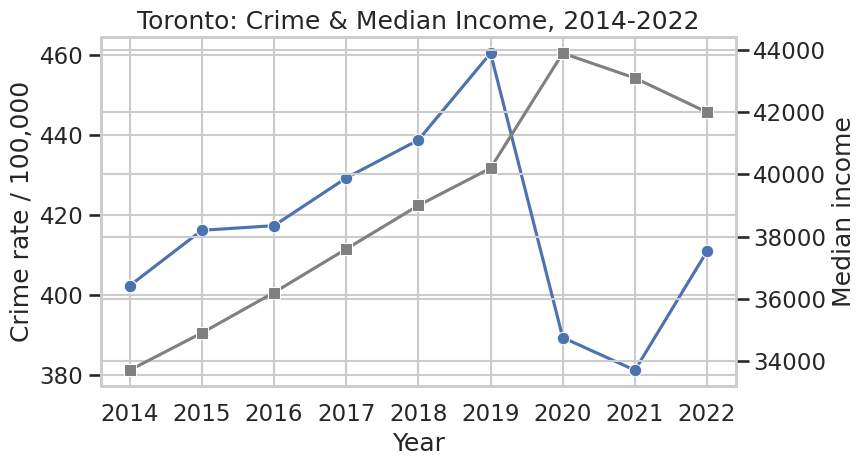

In [21]:
sns.set_theme(style="whitegrid", context="talk")

toronto_analysis.rename(columns={"YEAR": "Year"}, inplace=True)

graph = (
    toronto_analysis[["Year", "Crime Rate"]]
    .merge(toronto_income[["Year", "Median Income"]], on="Year", how="inner")
)
# scatter plot graph
plt.figure(figsize=(8, 6))
ax = sns.regplot(data=graph, x="Median Income", y="Crime Rate")
ax.set(title="Toronto: Crime Rate vs Median Income (2014-2022)", xlabel=" Median Income", ylabel="Crime Rate (per 100,000)")
for _, r in graph.iterrows():
    ax.text(r["Median Income"], r["Crime Rate"], r["Year"],fontsize=10)
plt.tight_layout()
plt.show()

#line series graph
fig, ax1 = plt.subplots(figsize=(9, 5))
sns.lineplot(data=graph, x="Year", y="Crime Rate", marker="o", ax=ax1)
ax1.set_ylabel("Crime rate / 100,000")

ax2 = ax1.twinx()
sns.lineplot(data=graph, x="Year", y="Median Income", marker="s", ax=ax2, color="gray")
ax2.set_ylabel("Median income")
ax1.set_title("Toronto: Crime & Median Income, 2014-2022")
plt.tight_layout()
plt.show()




#### Inference from Toronto's Graph:  
#### Income kept rising, but crime did not follow a clear path. Crime numbers swung up and down, most sharply in 2020‑2021. This hints that factors such as public‑health rules or policing changes had more effect on crime than income did during those years.

#### Vancouver

/tmp/ipykernel_12006/2765143135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_analysis.rename(columns={"YEAR": "Year"}, inplace=True)


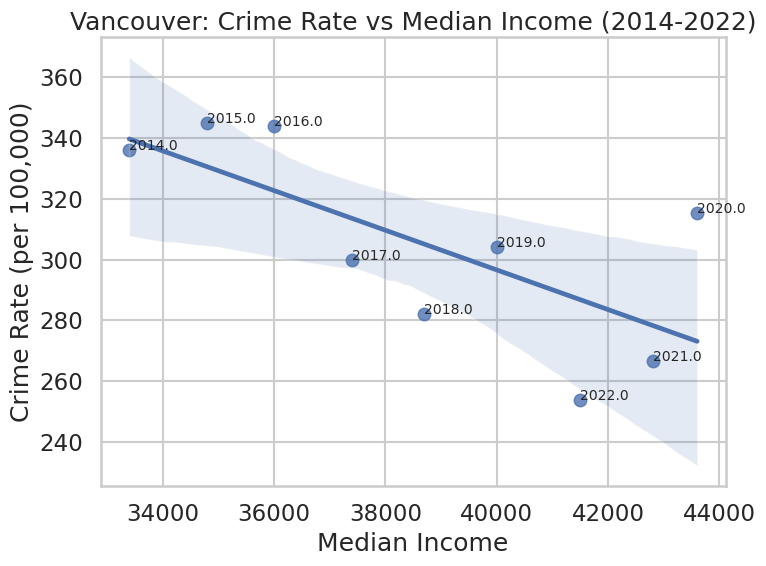

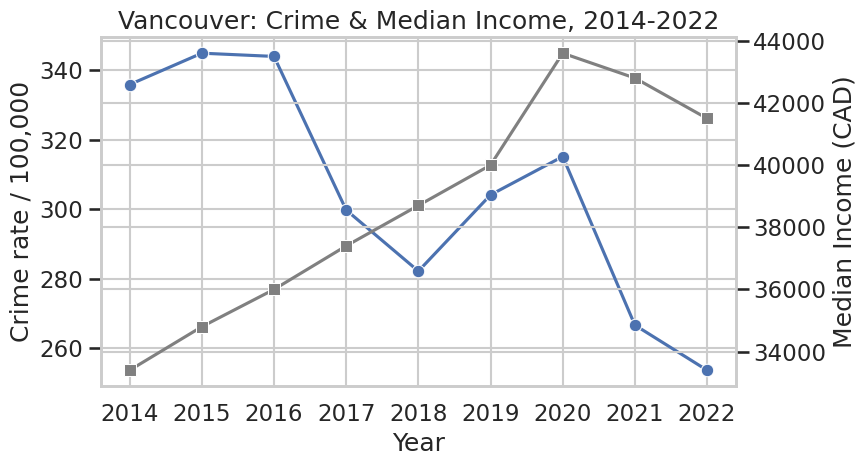

In [22]:
sns.set_theme(style="whitegrid", context="talk")

vancouver_analysis.rename(columns={"YEAR": "Year"}, inplace=True)

graph = (
    vancouver_analysis[["Year", "Crime Rate"]]
    .merge(vancouver_income[["Year", "Median Income"]], on="Year", how="inner")
)

# Scatter plot 
plt.figure(figsize=(8, 6))
ax = sns.regplot(data=graph, x="Median Income", y="Crime Rate")
ax.set(title="Vancouver: Crime Rate vs Median Income (2014-2022)", xlabel="Median Income", ylabel="Crime Rate (per 100,000)")
for _, r in graph.iterrows():
    ax.text(r["Median Income"], r["Crime Rate"], r["Year"], fontsize=10)
plt.tight_layout()
plt.show()

# line series graph
fig, ax1 = plt.subplots(figsize=(9, 5))
sns.lineplot(data=graph, x="Year", y="Crime Rate", marker="o", ax=ax1)
ax1.set_ylabel("Crime rate / 100,000")

ax2 = ax1.twinx()
sns.lineplot(data=graph, x="Year", y="Median Income", marker="s", ax=ax2, color="gray")
ax2.set_ylabel("Median Income (CAD)")
ax1.set_title("Vancouver: Crime & Median Income, 2014-2022")
plt.tight_layout()
plt.show()

#### Inference from Vancouver's Graph:
####  From 2014‑2022, income rose while crime generally fell, most clearly after 2017. The scatter plot and trend line show a steady downward slope with a tight confidence band. Year‑to‑year shifts exist, but the overall picture links higher income to lower crime and better public safety.



## Identifying Challenges and Opportunities

### Challenges
- **Uneven crime levels** – Some neighbourhoods keep seeing more crime than others.  
- **Income and education gaps** – Offenders often come from low‑income, low‑education areas and target richer ones.  
- **Limited local options** – High‑crime areas often lack good schools, jobs, and basic services.  

### Opportunities
- **Invest in schools and job training** – Better access can lower crime over time.  
- **Improve local services** – Good lighting, clean streets, and reliable transit can deter crime.  
- **Use data to guide action** – Direct funds and programs to the places that need them most.  


## Conclusion
### From 2014‑2022, Vancouver showed that as income rose, crime dropped. Toronto did not show the same steady pattern; its crime numbers moved up and down regardless of income. This suggests income matters, but policy, support programs, and other factors also shape crime trends.